In [1]:
import numpy as np 
# -- iquench -- 
from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats

In [2]:
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

# EAGLE
----
## Instantaneous SFR
Lets first read in the $100 Mpc$ box EAGLE simulation

In [3]:
cats = Cats.Catalog()
logM_big, logSFR_big, _, censat_big = cats.Read('eagle_inst')
is_cen_big = (censat_big == 1)

logM_big = logM_big[is_cen_big]
logSFR_big = logSFR_big[is_cen_big]

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:102: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs
/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)


In [4]:
# small 25Mpc box with low resolution (same as big box)
f_small_low = ''.join([UT.dat_dir(), 'EAGLE_RefL0025N0376_MstarSFR1G100MyrinstPosVel_allabove1.8e8Msun.txt']) 
n_grp_s_low, n_subgrp_s_low, logM_s_low, SFR_s_low, censat_s_low = np.loadtxt(f_small_low, skiprows=1, unpack=True, usecols=[0, 1, 2, 3, 6])
logSFR_s_low = np.log10(SFR_s_low)

is_cen_s_low = (censat_s_low.astype(int) == 1)

n_grp_s_low = n_grp_s_low[is_cen_s_low]
n_subgrp_s_low = n_subgrp_s_low[is_cen_s_low]
logM_s_low = logM_s_low[is_cen_s_low]
logSFR_s_low = logSFR_s_low[is_cen_s_low]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [5]:
# small 25Mpc box with high resolution (same as big box)
f_small_hi = ''.join([UT.dat_dir(), 'EAGLE_RefL0025_MstarSFR100Myr_allabove2.26e7Msun.txt']) 
n_grp_s_hi, n_subgrp_s_hi, logM_s_hi, SFR_s_hi, censat_s_hi = np.loadtxt(f_small_hi, skiprows=1, unpack=True, usecols=[0, 1, 2, 3, 6])
logSFR_s_hi = np.log10(SFR_s_hi)
is_cen_s_hi = (censat_s_hi.astype(int) == 1)

n_grp_s_hi = n_grp_s_hi[is_cen_s_hi]
n_subgrp_s_hi = n_subgrp_s_hi[is_cen_s_hi]
logM_s_hi = logM_s_hi[is_cen_s_hi]
logSFR_s_hi = logSFR_s_hi[is_cen_s_hi]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [6]:
# small 25Mpc box with high resolution (same as big box) RECALIBRATED
f_small_hi_re = ''.join([UT.dat_dir(), 'EAGLE_RecalL0025_MstarSFR100Myr_allabove2.26e7Msun.txt']) 
n_grp_s_hi_re, n_subgrp_s_hi_re, logM_s_hi_re, SFR_s_hi_re, censat_s_hi_re = np.loadtxt(f_small_hi_re, skiprows=1, unpack=True, usecols=[0, 1, 2, 3, 6])
logSFR_s_hi_re = np.log10(SFR_s_hi_re)
is_cen_s_hi_re = (censat_s_hi_re.astype(int) == 1)

n_grp_s_hi_re = n_grp_s_hi_re[is_cen_s_hi_re]
n_subgrp_s_hi_re = n_subgrp_s_hi_re[is_cen_s_hi_re]
logM_s_hi_re = logM_s_hi_re[is_cen_s_hi_re]
logSFR_s_hi_re = logSFR_s_hi_re[is_cen_s_hi_re]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


(-4.0, 2.0)

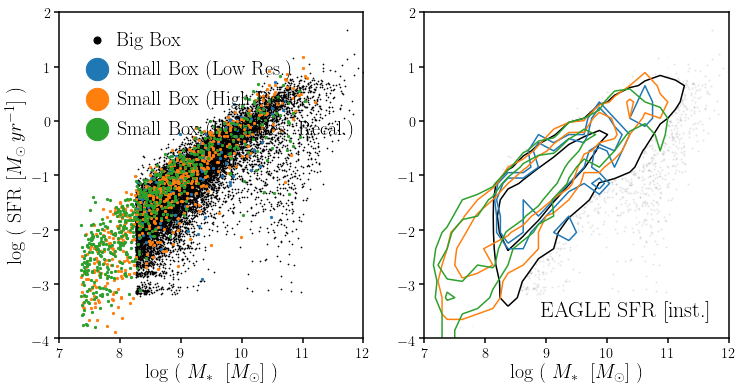

In [7]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Big Box')
sub.scatter(logM_s_low, logSFR_s_low, c='C0', s=5, label='Small Box (Low Res.)')
sub.scatter(logM_s_hi, logSFR_s_hi, c='C1', s=5, label='Small Box (High Res.)')
sub.scatter(logM_s_hi_re, logSFR_s_hi_re, c='C2', s=5, label='Small Box (High Res. Recal.)')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_low, logSFR_s_low, color='C0',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi, logSFR_s_hi, color='C1',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi_re, logSFR_s_hi_re, color='C2',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

## $100$ Myr SFR

In [8]:
cats = Cats.Catalog()
logM_big, logSFR_big, _, censat_big = cats.Read('eagle_100myr')
is_cen_big = (censat_big == 1)

logM_big = logM_big[is_cen_big]
logSFR_big = logSFR_big[is_cen_big]

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ eagle_100myr ------
14743 of 29810 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)


In [9]:
# small 25Mpc box with low resolution (same as big box)
SFR_s_low = np.loadtxt(f_small_low, skiprows=1, unpack=True, usecols=[5])
logSFR_s_low = np.log10(SFR_s_low)
logSFR_s_low = logSFR_s_low[is_cen_s_low]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# small 25Mpc box with high resolution (same as big box)
SFR_s_hi = np.loadtxt(f_small_hi, skiprows=1, unpack=True, usecols=[5])
logSFR_s_hi = np.log10(SFR_s_hi)
logSFR_s_hi = logSFR_s_hi[is_cen_s_hi]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# small 25Mpc box with high resolution (same as big box)
SFR_s_hi_re = np.loadtxt(f_small_hi_re, skiprows=1, unpack=True, usecols=[5])
logSFR_s_hi_re = np.log10(SFR_s_hi_re)
logSFR_s_hi_re = logSFR_s_hi_re[is_cen_s_hi_re]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-4.0, 2.0)

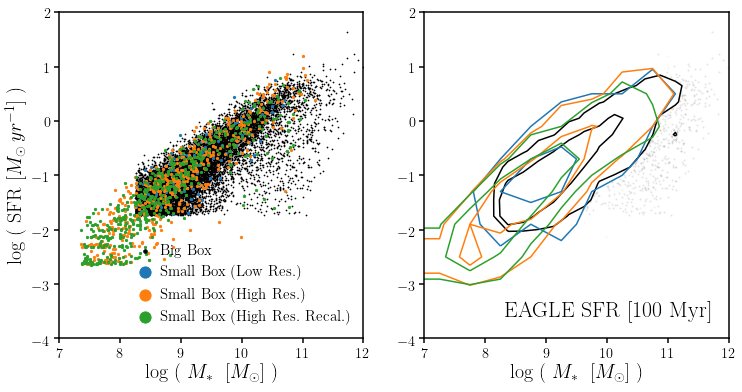

In [12]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Big Box')
sub.scatter(logM_s_low, logSFR_s_low, c='C0', s=5, label='Small Box (Low Res.)')
sub.scatter(logM_s_hi, logSFR_s_hi, c='C1', s=5, label='Small Box (High Res.)')
sub.scatter(logM_s_hi_re, logSFR_s_hi_re, c='C2', s=5, label='Small Box (High Res. Recal.)')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_low, logSFR_s_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi, logSFR_s_hi, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi_re, logSFR_s_hi_re, color='C2', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

# Illustris 
----
## Instantaneous SFR 

In [13]:
cats = Cats.Catalog()
logM_big, logSFR_big, _, censat_big = cats.Read('illustris_inst')
is_cen_big = (censat_big == 1)

logM_big = logM_big[is_cen_big]
logSFR_big = logSFR_big[is_cen_big]

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:83: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_ssfr) + logM # calculate log SFR from sSFR
/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ illustris_inst ------
7000 of 66808 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)


In [25]:
# same size box with low resolution
f_big_low = ''.join([UT.dat_dir(), 'Illustris2_extended_individual_galaxy_values_all1e8Msunh_z0.csv'])
logM_b_low, SSFR_b_low, censat_b_low = np.loadtxt(f_big_low, skiprows=1, unpack=True, 
                                                  usecols=[0, 1, -1], delimiter=',')
logSFR_b_low = np.log10(SSFR_b_low) + logM_b_low

# at least 100 particle limit 
particle100_low = (logM_b_low > 9.)

is_cen_b_low = (censat_b_low.astype(int) == 1) #& particle100_low

logM_b_low = logM_b_low[is_cen_b_low]
logSFR_b_low = logSFR_b_low[is_cen_b_low]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [26]:
# same size box with even lower resolution 
f_big_lower = ''.join([UT.dat_dir(), 'Illustris3_extended_individual_galaxy_values_all1e8Msunh_z0.csv'])
logM_b_lower, SSFR_b_lower, censat_b_lower = np.loadtxt(f_big_lower, skiprows=1, unpack=True, 
                                                  usecols=[0, 1, -1], delimiter=',')
logSFR_b_lower = np.log10(SSFR_b_lower) + logM_b_lower

particle100_lower = (logM_b_lower > 9.9)

is_cen_b_lower = (censat_b_lower.astype(int) == 1) #& particle100_lower

logM_b_lower = logM_b_lower[is_cen_b_lower]
logSFR_b_lower = logSFR_b_lower[is_cen_b_lower]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


(-4.0, 2.0)

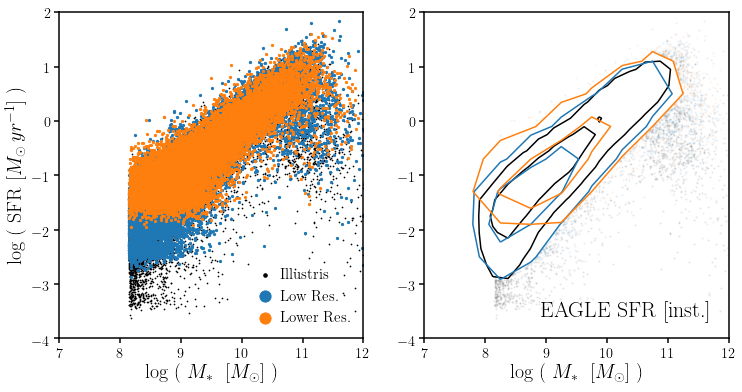

In [27]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Illustris')
sub.scatter(logM_b_low, logSFR_b_low, c='C0', s=5, label='Low Res.')
sub.scatter(logM_b_lower, logSFR_b_lower, c='C1', s=5, label='Lower Res.')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_b_low, logSFR_b_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_b_lower, logSFR_b_lower, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

## 100 Myr

In [28]:
cats = Cats.Catalog()
logM_big, logSFR_big, _, censat_big = cats.Read('illustris_100myr')
is_cen_big = (censat_big == 1)

logM_big = logM_big[is_cen_big]
logSFR_big = logSFR_big[is_cen_big]

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ illustris_100myr ------
16943 of 66808 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)


In [34]:
# same size box with low resolution
f_big_low = ''.join([UT.dat_dir(), 'Illustris2_extended_individual_galaxy_values_all1e8Msunh_z0.csv'])
logM_b_low, SSFR_b_low, censat_b_low = np.loadtxt(f_big_low, skiprows=1, unpack=True, 
                                                  usecols=[0, 4, -1], delimiter=',')
logSFR_b_low = np.log10(SSFR_b_low) + logM_b_low

# at least 100 particle limit 
particle100_low = (logM_b_low > 9.)

is_cen_b_low = (censat_b_low.astype(int) == 1) & particle100_low

logM_b_low = logM_b_low[is_cen_b_low]
logSFR_b_low = logSFR_b_low[is_cen_b_low]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [35]:
# same size box with even lower resolution 
f_big_lower = ''.join([UT.dat_dir(), 'Illustris3_extended_individual_galaxy_values_all1e8Msunh_z0.csv'])
logM_b_lower, SSFR_b_lower, censat_b_lower = np.loadtxt(f_big_lower, skiprows=1, unpack=True, 
                                                  usecols=[0, 4, -1], delimiter=',')
logSFR_b_lower = np.log10(SSFR_b_lower) + logM_b_lower

particle100_lower = (logM_b_lower > 9.9)

is_cen_b_lower = (censat_b_lower.astype(int) == 1) & particle100_lower

logM_b_lower = logM_b_lower[is_cen_b_lower]
logSFR_b_lower = logSFR_b_lower[is_cen_b_lower]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


(-4.0, 2.0)

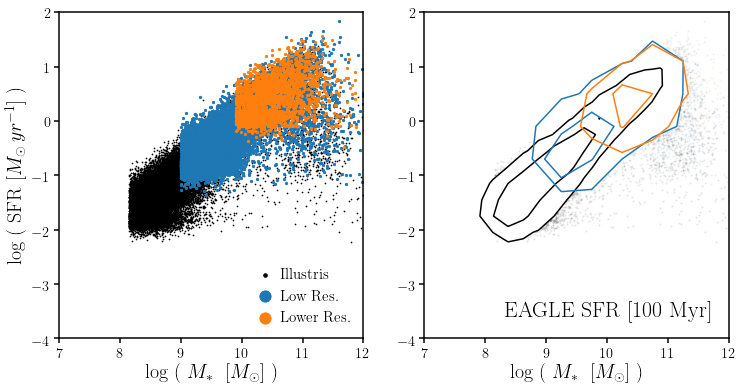

In [36]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Illustris')
sub.scatter(logM_b_low, logSFR_b_low, c='C0', s=5, label='Low Res.')
sub.scatter(logM_b_lower, logSFR_b_lower, c='C1', s=5, label='Lower Res.')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_b_low, logSFR_b_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_b_lower, logSFR_b_lower, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])